In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
D = 0.20          # Initial density of positive opinions 
w = 0.8           # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 
phi = 0.01        # Resusceptibility probability: vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps
# lambda_values = [0.1, 0.6, 0.7, 0.8] 

In [3]:
def generate_graph(N, p):
    # Generate a random graph using the ER model
    G = nx.fast_gnp_random_graph(N, p, seed=42)

    print("Maximum degree:", max(dict(G.degree()).values()))

    isolates = list(nx.isolates(G))
    print(f"Number of isolates: {len(isolates)}")

    # add an edge between an isolate and a random node
    for isolate in isolates:
        edge = np.random.choice(G.nodes())
        G.add_edge(isolate, edge)
        
    # Get the adjacency matrix
    A = nx.adjacency_matrix(G)
    # Convert the sparse matrix to a NumPy array
    A = A.toarray()
    # make the neighbors of each node
    neighbors_list = [list(G.neighbors(node)) for node in range(N)]
    return A, neighbors_list

In [4]:
p = 0.001

In [5]:
A, neighbors_list = generate_graph(N, p)

Maximum degree: 27
Number of isolates: 0


In [6]:
def simulate_on_ER(lambda_value, alpha, phi, D, w, N, mcs, neighbors_list, A):
    # Initialize epidemic compartments
    opinions = np.zeros(N)

    opinions = np.where(np.random.uniform(0, 1, N) <= D, np.random.uniform(0, 1, N), np.random.uniform(-1, 0, N))
    susceptible = np.ones(N)
    infected = np.zeros(N)
    vaccinated = np.zeros(N)

    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    infected[random_indices] = 1
    susceptible[random_indices] = 0

    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    for k in range(mcs):
        print("mcs \n", k)
        epsilon = 1
        # epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0, 1]
        new_opinions = np.zeros(N)

        # print("# of infected ", np.sum(infected))
        # print("# of vaccinated ", np.sum(vaccinated))
        # print("# of susceptible ", np.sum(susceptible))
        # print("\n")

        # Opinion dynamics
        for i in range(N):
            sum_neighbor_opinions = 0 # Sum of opinions of neighbors
            sum_neighbor_infected_proportion = 0 # Sum of neighbors proportion of infected neighbors
            neighbors_of_i = neighbors_list[i]   # Get neighbors of node i
            sum_neighbor_opinions = sum(A[i][j] * opinions[j] for j in neighbors_of_i)
            
            for j in neighbors_of_i:
                neighbors_of_j = neighbors_list[j]
                if len(neighbors_of_j) > 0:
                    sum_neighbor_infected_proportion += (A[i][j] * np.sum(infected[neighbors_of_j])/len(neighbors_of_j))
                else :
                    sum_neighbor_infected_proportion += 0

            # Calculate the new opinion for node i
            degree = max(len(neighbors_of_i), 1)
            new_opinions[i] = opinions[i] + (epsilon / degree) * sum_neighbor_opinions + (w / degree) * sum_neighbor_infected_proportion
           

            # Check upper and lower bounds for opinions
            new_opinions[i] = max(-1, min(1, new_opinions[i]))

        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            neighbors_of_i = neighbors_list[i]   # Get neighbors of node i
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                elif len(neighbors_of_i) > 0:
                    neighbor = np.random.choice(neighbors_of_i)  # Randomly select a neighbor
                    if infected[neighbor] == 1 and np.random.uniform(0, 1) <= lambda_value:
                        infected[i] = 1
                        susceptible[i] = 0

            if infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1

            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion



In [7]:
lambda_values = np.linspace(0, 1, 30) 

In [8]:
infected_data = []  # Reset infected_data for w_val
mean_opinion_data = []  # Reset mean_opinion_data for w_val
vaccinated_data = []
for lambda_val in lambda_values:
    time_series_infected, time_series_vaccinated, time_series_average_opinion = simulate_on_ER(lambda_val, alpha, phi, D, w, N, mcs, neighbors_list, A)
    infected_data.append(np.mean(time_series_infected[-1:]))  # Use the last 1 values for averaging
    mean_opinion_data.append(np.mean(time_series_average_opinion[-1:]))  # Use the last 1 values for averaging
    vaccinated_data.append(np.mean(time_series_vaccinated[-1:]))  # Use the last 1 values for averaging

mcs 
 0
mcs 
 1
mcs 
 2
mcs 
 3
mcs 
 4
mcs 
 5
mcs 
 6
mcs 
 7
mcs 
 8
mcs 
 9
mcs 
 10
mcs 
 11
mcs 
 12
mcs 
 13
mcs 
 14
mcs 
 15
mcs 
 16
mcs 
 17
mcs 
 18
mcs 
 19
mcs 
 20
mcs 
 21
mcs 
 22
mcs 
 23
mcs 
 24
mcs 
 25
mcs 
 26
mcs 
 27
mcs 
 28
mcs 
 29
mcs 
 30
mcs 
 31
mcs 
 32
mcs 
 33
mcs 
 34
mcs 
 35
mcs 
 36
mcs 
 37
mcs 
 38
mcs 
 39
mcs 
 40
mcs 
 41
mcs 
 42
mcs 
 43
mcs 
 44
mcs 
 45
mcs 
 46
mcs 
 47
mcs 
 48
mcs 
 49
mcs 
 50
mcs 
 51
mcs 
 52
mcs 
 53
mcs 
 54
mcs 
 55
mcs 
 56
mcs 
 57
mcs 
 58
mcs 
 59
mcs 
 60
mcs 
 61
mcs 
 62
mcs 
 63
mcs 
 64
mcs 
 65
mcs 
 66
mcs 
 67
mcs 
 68
mcs 
 69
mcs 
 70
mcs 
 71
mcs 
 72
mcs 
 73
mcs 
 74
mcs 
 75
mcs 
 76
mcs 
 77
mcs 
 78
mcs 
 79
mcs 
 80
mcs 
 81
mcs 
 82
mcs 
 83
mcs 
 84
mcs 
 85
mcs 
 86
mcs 
 87
mcs 
 88
mcs 
 89
mcs 
 90
mcs 
 91
mcs 
 92
mcs 
 93
mcs 
 94
mcs 
 95
mcs 
 96
mcs 
 97
mcs 
 98
mcs 
 99
mcs 
 0
mcs 
 1
mcs 
 2
mcs 
 3
mcs 
 4
mcs 
 5
mcs 
 6
mcs 
 7
mcs 
 8
mcs 
 9
mcs 
 10
mcs 
 11
mcs 
 12
mcs

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\ranaj\AppData\Local\Temp\ipykernel_31212\1186971236.py:4: SyntaxWarning: invalid escape sequence '\i'
  ax1.set_ylabel('Mean Opinion $m_{\infty}$', color='red')
C:\Users\ranaj\AppData\Local\Temp\ipykernel_31212\1186971236.py:9: SyntaxWarning: invalid escape sequence '\i'
  ax2.set_ylabel('Stationary Density of Infected Agents $I_{\infty}$', color='black')
C:\Users\ranaj\AppData\Local\Temp\ipykernel_31212\1186971236.py:13: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Stationary Density of Infected Agents $I_{\infty}$ and Mean Opinion $m_{\infty}$ as a Function of λ (w = 0.3)')
No artists with labels found to put in legend.  Note that artists whose label start with an un

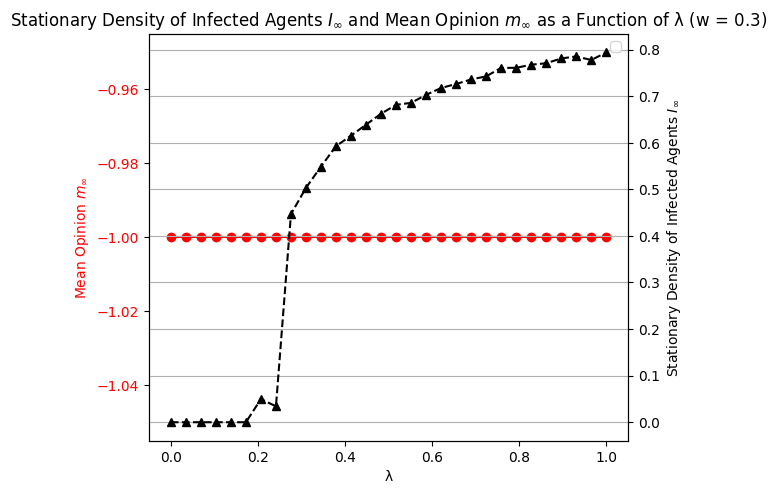

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(lambda_values, mean_opinion_data, 'ro-')
ax1.set_xlabel('λ')
ax1.set_ylabel('Mean Opinion $m_{\infty}$', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Plot infected_data for w = 0.3
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(lambda_values, infected_data, 'k^--')
ax2.set_ylabel('Stationary Density of Infected Agents $I_{\infty}$', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout() 
plt.title('Stationary Density of Infected Agents $I_{\infty}$ and Mean Opinion $m_{\infty}$ as a Function of λ (w = 0.3)')
plt.grid(True)
plt.legend()
plt.show()